In [9]:
%install-location $cwd/swift-install
%install '.package(path: "$cwd/SchwiftyNotebook_initial_setup")' SchwiftyNotebook_initial_setup

: 

In [12]:
import SchwiftyNotebook_initial_setup

In [13]:
famRavioli()

yeet yeet yeet, fam ravioli


In [14]:
let 😎 = "Bauss"

In [15]:
print(😎)

Bauss


In [16]:
let thing = ("wheel", "thingo")

In [17]:
let (a,b) = thing
(a,b)

▿ 2 elements
  - .0 : "wheel"
  - .1 : "thingo"


In [18]:
import Python
import TensorFlow


In [19]:
//export
import Path
import TensorFlow

In [20]:
let (xTrainingData, yTrainingData, xValidationData, yValidationData) = loadMNISTData(path: mnistPath)

In [21]:
(xTrainingData.standardDeviation(), xTrainingData.mean())

▿ 2 elements
  - .0 : 0.3081074
  - .1 : 0.13066047


In [22]:
//export
func normalizeTensor<T:TensorFlowFloatingPoint>(tensor: Tensor<T>)-> Tensor<T>{
    return (tensor - tensor.mean())/tensor.standardDeviation()
}

In [23]:
let xTrainingDataNormalized = normalizeTensor(tensor: xTrainingData)

In [24]:
(xTrainingDataNormalized.standardDeviation(), xTrainingDataNormalized.mean())

▿ 2 elements
  - .0 : 0.9999983
  - .1 : -7.315915e-08


In [25]:
%include "EnableIPythonDisplay.swift"
IPythonDisplay.shell.enable_matplotlib("inline")

('inline', 'module://ipykernel.pylab.backend_inline')


In [26]:
let digit = xTrainingDataNormalized[69]

In [27]:
public let plotter = Python.import("matplotlib.pyplot")

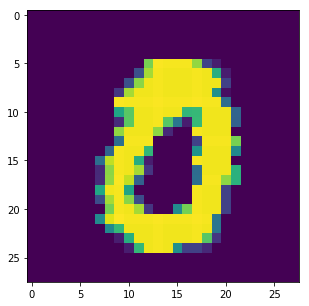

None


In [28]:
plotter.figure(figsize: [5,5])
plotter.show(plotter.imshow(X: digit.makeNumpyArray().reshape(28,28)))

In [29]:
//export
extension Bool {
    var symbol: String {
        return self ? "😈" : "👿"
    }
}

In [30]:
print(true.symbol)

😈


In [31]:
Array(1...10).reduce(0, +)

55


# Enter Linear Algebra

In [32]:
let ranbo = Tensor<Float>(randomNormal: [10, 784], seed: (69,420))

In [33]:
let ranboVector = Tensor<Float>(randomNormal: [5, 784], seed: (69, 420))

In [34]:
ranbo.shape

▿ [10, 784]
  ▿ dimensions : 2 elements
    - 0 : 10
    - 1 : 784


In [35]:
(ranbo.mean(), ranbo.standardDeviation())

▿ 2 elements
  - .0 : 0.0054245885
  - .1 : 0.9981854


In [36]:
let rando = ranbo / sqrt(Float(ranbo.shape[1]))

In [37]:
(rando.mean(), rando.standardDeviation())

▿ 2 elements
  - .0 : 0.00019373519
  - .1 : 0.035649475


In [38]:
func shittyWomboCombo(a: [Float], 
                      b: [Float], 
                      aDims: (Int,Int), 
                      bDims: (Int,Int)) -> [Float] {
    assert(aDims.1 == bDims.0, "matmul shape mismatch")
    
    var womboCombo = Array(repeating: Float(0.0), 
                           count: aDims.0 * bDims.1)
    for 😂 in 0..<aDims.0 { // a rows
        for 🧐 in 0..<bDims.1 { // b columns
            for 🤩 in 0..<bDims.0 { // b rows
               womboCombo[😂 * bDims.1 + 🧐] += a[😂 * bDims.1 + 🤩] * b[🤩 * bDims.1 + 🧐]
            }
        }
        
    }
    return womboCombo
}

In [39]:
let ranboVectorTransposed = ranboVector.transposed()

In [40]:
let 💩WomboCombo = shittyWomboCombo(a: rando.scalars, 
                                b: ranboVector.scalars, 
                                aDims: (rando.shape[0], rando.shape[1]), 
                                bDims: (ranboVectorTransposed.shape[0], ranboVectorTransposed.shape[1]))

In [41]:
💩WomboCombo.capacity

50


In [42]:
time(repeating: 100 ) {
    shittyWomboCombo(a: rando.scalars, 
                                b: ranboVector.scalars, 
                                aDims: (rando.shape[0], rando.shape[1]), 
                                bDims: (ranboVectorTransposed.shape[0], ranboVectorTransposed.shape[1]))
}

average: 0.15009494 ms,   min: 0.14879 ms,   max: 0.183045 ms


In [43]:
func dangerWomboCombo(a: [Float], 
                      b: [Float], 
                      aDims: (Int,Int), 
                      bDims: (Int,Int)) -> [Float] {
    assert(aDims.1 == bDims.0, "matmul shape mismatch")
    
    var womboCombo = Array(repeating: Float(0.0), 
                           count: aDims.0 * bDims.1)
    womboCombo.withUnsafeMutableBufferPointer{ womboCombo in
         for 😂 in 0..<aDims.0 { // a rows
            for 🧐 in 0..<bDims.1 { // b columns
                for 🤩 in 0..<bDims.0 { // b rows
                   womboCombo[😂 * bDims.1 + 🧐] += a[😂 * bDims.1 + 🤩] * b[🤩 * bDims.1 + 🧐]
                }
            }

        }   
    }
    return womboCombo
}

In [44]:
time(repeating: 100 ) {
    dangerWomboCombo(a: rando.scalars, 
                                b: ranboVector.scalars, 
                                aDims: (rando.shape[0], rando.shape[1]), 
                                bDims: (ranboVectorTransposed.shape[0], ranboVectorTransposed.shape[1]))
}

average: 0.09343729999999999 ms,   min: 0.091825 ms,   max: 0.136322 ms


In [45]:
let dangerCombo = dangerWomboCombo(a: rando.scalars, 
                                b: ranboVector.scalars, 
                                aDims: (rando.shape[0], rando.shape[1]), 
                                bDims: (ranboVectorTransposed.shape[0], ranboVectorTransposed.shape[1]))

In [46]:
let dangerComboReshaped = Tensor(dangerCombo)
                .reshaped(to: [rando.shape[0], ranboVectorTransposed.shape[1]])

In [47]:
dangerComboReshaped.shape

▿ [10, 5]
  ▿ dimensions : 2 elements
    - 0 : 10
    - 1 : 5


In [49]:
let ptr : UnsafeMutableRawPointer = malloc(42)

print("☠️☠️ Uninitialized garbage =", ptr.load(as: UInt8.self))

free(ptr)

☠️☠️ Uninitialized garbage = 224


In [50]:
let tensorOne = Tensor<Float>(randomNormal: [5, 784])
let tensorTwo = Tensor<Float>(randomNormal: [784, 10])

In [52]:
print("tensorOne Shape \(tensorOne.shape)")
print("tensorTwo Shape \(tensorTwo.shape)")

tensorOne Shape [5, 784]
tensorTwo Shape [784, 10]


In [53]:
let smolBoi = Tensor<Float>([[1,2],[3,4]])
print(smolBoi.shape)

[2, 2]


In [85]:
let smolBoiWomboCombo = smolBoi • smolBoi

In [58]:
time(repeating: 10 ) { matmul(smolBoi, smolBoi) }

average: 0.0101148 ms,   min: 0.009213 ms,   max: 0.014546 ms


In [59]:
time(repeating: 10 ) { dangerWomboCombo(a: smolBoi.scalars, 
                 b: smolBoi.scalars, 
                 aDims: (smolBoi.shape[0], smolBoi.shape[1]), 
                 bDims: (smolBoi.shape[0], smolBoi.shape[1]))
                     }

average: 0.015324599999999999 ms,   min: 0.015058 ms,   max: 0.016168 ms


In [56]:
let dangerSmolBoi = dangerWomboCombo(a: smolBoi.scalars, 
                 b: smolBoi.scalars, 
                 aDims: (smolBoi.shape[0], smolBoi.shape[1]), 
                 bDims: (smolBoi.shape[0], smolBoi.shape[1]))

In [78]:
let tensorDangerSmolBoi = Tensor(dangerSmolBoi).reshaped(to: [2,2])
tensorDangerSmolBoi

[[ 7.0, 10.0],
 [15.0, 22.0]]


In [70]:
//export
struct AssertionError: Error {
    let message: String
    init(_ message: String){
        self.message = message
    }
}

In [74]:
//export
func assert(toAssert: Bool, message: String = "Not True!") throws {
    if(!toAssert){
        throw AssertionError(message)
    }
}

In [75]:
throw AssertionError("Yeet")

▿ AssertionError
  - message : "Yeet"


In [82]:
assert((smolBoiWomboCombo - tensorDangerSmolBoi).sum() < 0.001, "Matrix Multiplication not working")

In [86]:
let a = Tensor([10.0, 6, -4])
let b = Tensor([2.0, 8, 7])
(a,b)

▿ 2 elements
  - .0 : [10.0,  6.0, -4.0]
  - .1 : [2.0, 8.0, 7.0]


In [87]:
a + b

[12.0, 14.0,  3.0]


In [89]:
a < b

false


In [90]:
a .< b

[false,  true,  true]


In [91]:
a > b

false


In [92]:
(a .> b).any()

true


In [94]:
let aUnsqueezed = a.expandingShape(at: 1)

In [95]:
aUnsqueezed.shape

▿ [3, 1]
  ▿ dimensions : 2 elements
    - 0 : 3
    - 1 : 1


In [96]:
let ranboVector = Tensor<Float>(randomNormal: [784], seed: (69, 420))

In [102]:
(ranboVector.shape, ranbo.shape)

▿ 2 elements
  ▿ .0 : [784]
    ▿ dimensions : 1 element
      - 0 : 784
  ▿ .1 : [10, 784]
    ▿ dimensions : 2 elements
      - 0 : 10
      - 1 : 784


In [100]:
ranbo • ranboVector.expandingShape(at: 1)

[[  817.2468],
 [-56.730915],
 [ 31.500309],
 [-15.890228],
 [ 2.3912425],
 [  7.719559],
 [ 34.176323],
 [-37.383972],
 [ 19.708015],
 [-40.754112]]


In [107]:
ranbo[0].shape

▿ [784]
  ▿ dimensions : 1 element
    - 0 : 784


In [108]:
func tensorWomboCombo(a: Tensor<Float>, b: Tensor<Float>) -> Tensor<Float>{
    let (aRows, aColumns) = (a.shape[0], a.shape[1])
    let (bRows, bColumns) = (b.shape[0], b.shape[1])
    assert(aColumns == bRows, "Cannot multiply a \(a.shape) with \(b.shape)")
    var result = Tensor<Float>(zeros: [aRows, bColumns])
    
    for i in 0..<aRows{
        result[i] = (b • a[i]).transposed()
    }
    
    return result
    
}

In [109]:
assert((smolBoiWomboCombo - tensorWomboCombo(a: smolBoi, b: smolBoi)).sum() < 0.001, "Matrix Multiplication not working")

Fatal error: In[1] is not a matrix. Instead it has shape [2]: file /swift-base/tensorflow-swift-apis/Sources/TensorFlow/Bindings/EagerExecution.swift, line 299
Current stack trace:
0    libswiftCore.so                    0x00007f9e78bdd8b0 swift_reportError + 50
1    libswiftCore.so                    0x00007f9e78c4caa0 _swift_stdlib_reportFatalErrorInFile + 115
2    libswiftCore.so                    0x00007f9e78b74ace <unavailable> + 3738318
3    libswiftCore.so                    0x00007f9e78b74c47 <unavailable> + 3738695
4    libswiftCore.so                    0x00007f9e78942c4d <unavailable> + 1436749
5    libswiftCore.so                    0x00007f9e78b49a78 <unavailable> + 3562104
6    libswiftCore.so                    0x00007f9e789420a9 <unavailable> + 1433769
7    libswiftTensorFlow.so              0x00007f9e74da58e0 <unavailable> + 2672864
8    libswiftTensorFlow.so              0x00007f9e74c0aa60 checkOk(_:file:line:) + 461
9    libswiftTensorFlow.so              0x00007f9e

: 